In [63]:
import pandas as pd
import numpy as np
import lux
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
train = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- employee attrition\train.csv")
test = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- employee attrition\test.csv")
submission = pd.read_csv(r"C:\Users\lenovo\Documents\Uma\data\hackathon- employee attrition\sample_submission.csv")

In [3]:
train_c = train.copy()
test_c = test.copy()

In [4]:
train.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [5]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [6]:
train.duplicated().sum()

0

In [7]:
train.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [8]:
train['Time_of_service'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [9]:
train['VAR2'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [10]:
train['Work_Life_balance'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [11]:
train['Time_of_service'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [12]:
train['Age'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [13]:
train['VAR4'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [14]:
train['Pay_Scale'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [15]:
train['Age'].fillna(22.0, inplace = True)

In [16]:
train['Time_of_service'].fillna(6.0, inplace = True)

In [17]:
train['Work_Life_balance'].fillna(1.0, inplace = True)

In [18]:
train['Pay_Scale'].fillna(8.0, inplace = True)

In [19]:
train['VAR2'].fillna(0.7516, inplace = True)

In [20]:
train['VAR4'].fillna(2.0, inplace = True)

In [21]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [22]:
train.duplicated().sum()

0

In [23]:
train.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [24]:
train['Compensation_and_Benefits'].value_counts()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [25]:
train['Gender'].replace({'F': 0, 'M': 1}, inplace = True)

In [26]:
train['Relationship_Status'].replace({'Single': 0, 'Married': 1}, inplace = True)

In [27]:
train['Hometown'].replace({'Clinton': 0, 'Washington': 1, 'Franklin': 2, 'Springfield': 3, 'Lebanon': 4}, inplace = True)

In [28]:
train['Unit'] = train['Unit'].astype('category').cat.codes

In [29]:
train['Decision_skill_possess'].replace({'Behavioral': 0, 'Directive': 1, 'Analytical': 2, 'Conceptual': 3}, inplace = True)

In [30]:
train['Compensation_and_Benefits'].replace({'type0': 0, 'type1': 1, 'type2': 2, 'type3': 3, 'type4': 4}, inplace = True)

In [31]:
train.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   int64  
 2   Age                        7000 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   int64  
 5   Hometown                   7000 non-null   int64  
 6   Unit                       7000 non-null   int8   
 7   Decision_skill_possess     7000 non-null   int64  
 8   Time_of_service            7000 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  7000 non-null   float

In [32]:
train_num = train.select_dtypes(include = np.number)
train_num[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [33]:
train_num_y = train_num.drop(columns = 'Attrition_rate')

In [34]:
scale1 = StandardScaler()

In [35]:
train_num1 = pd.DataFrame(scale1.fit_transform(train_num_y), columns = train_num_y.columns)
train_num1.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

EDA

In [36]:
train_num.corr()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [39]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (30,20)

<AxesSubplot:>

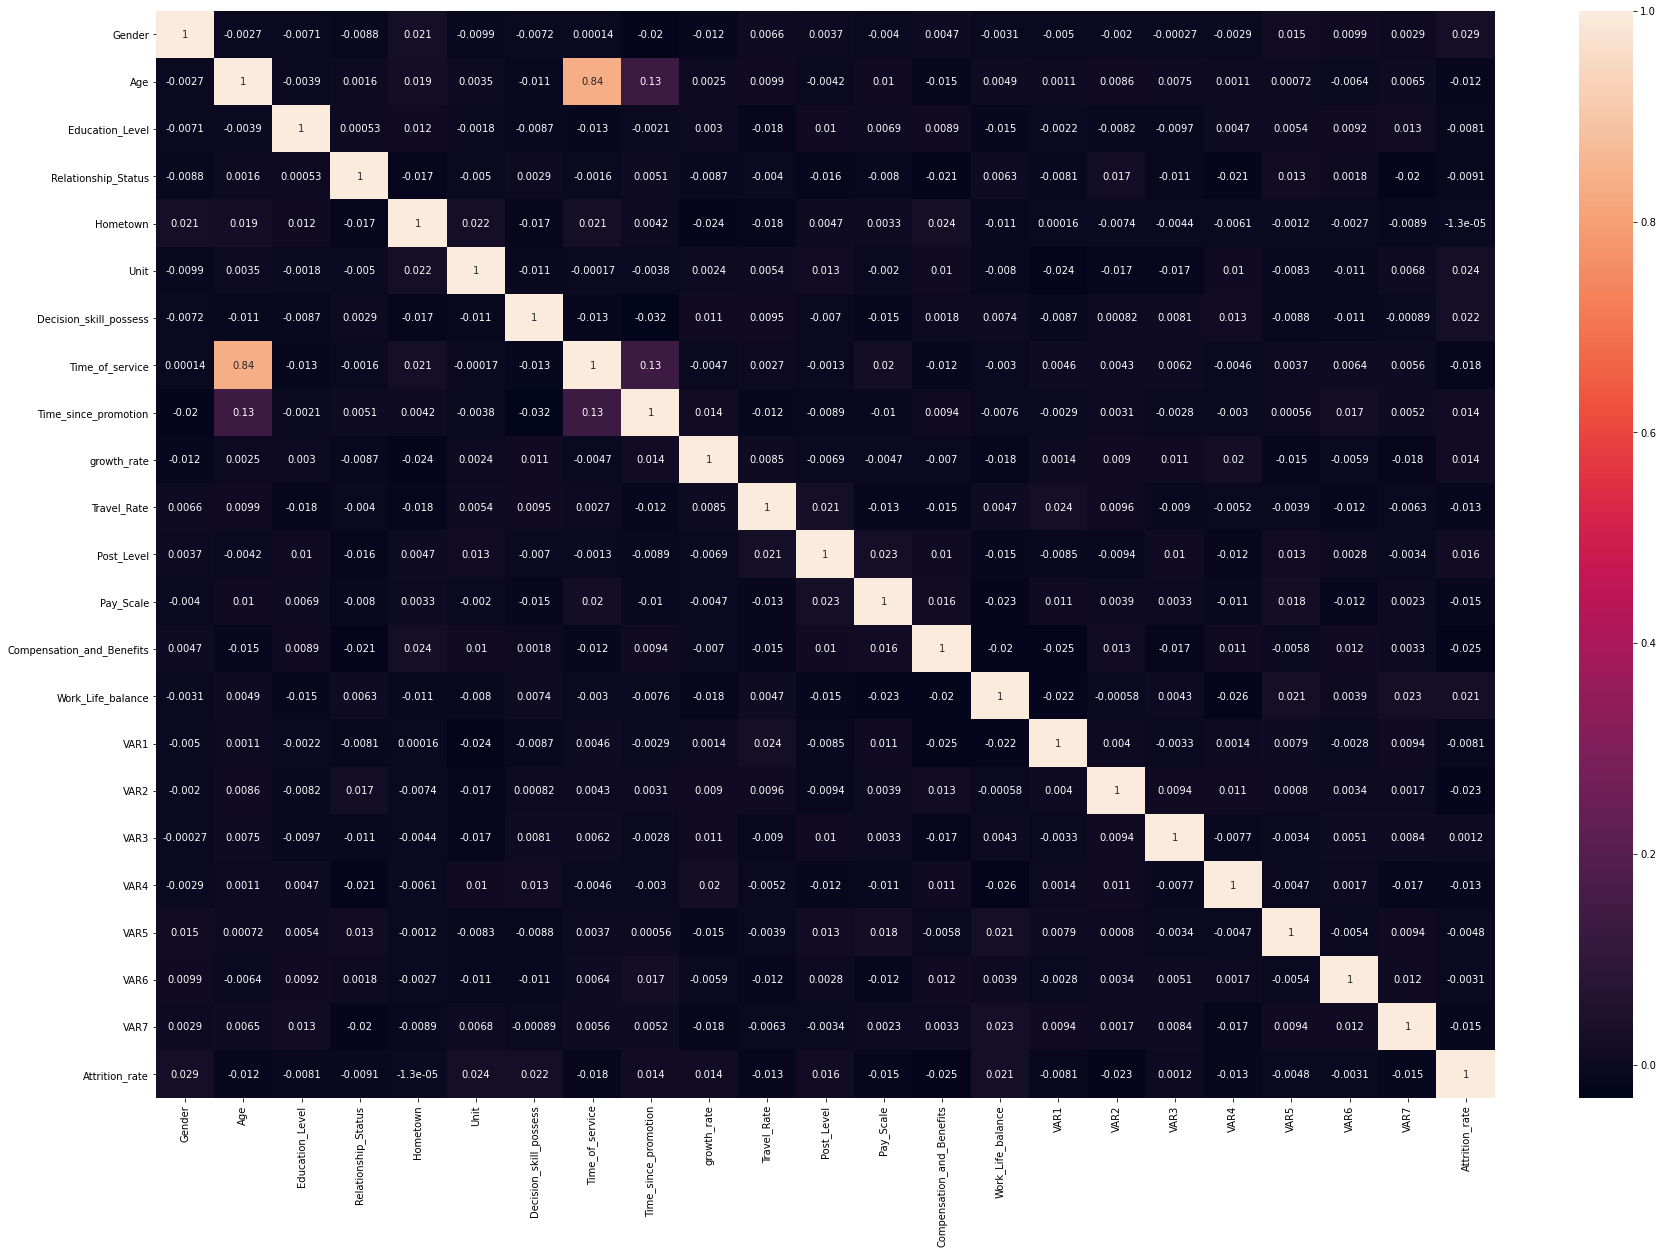

In [40]:
sns.heatmap(train_num.corr(), annot = True)

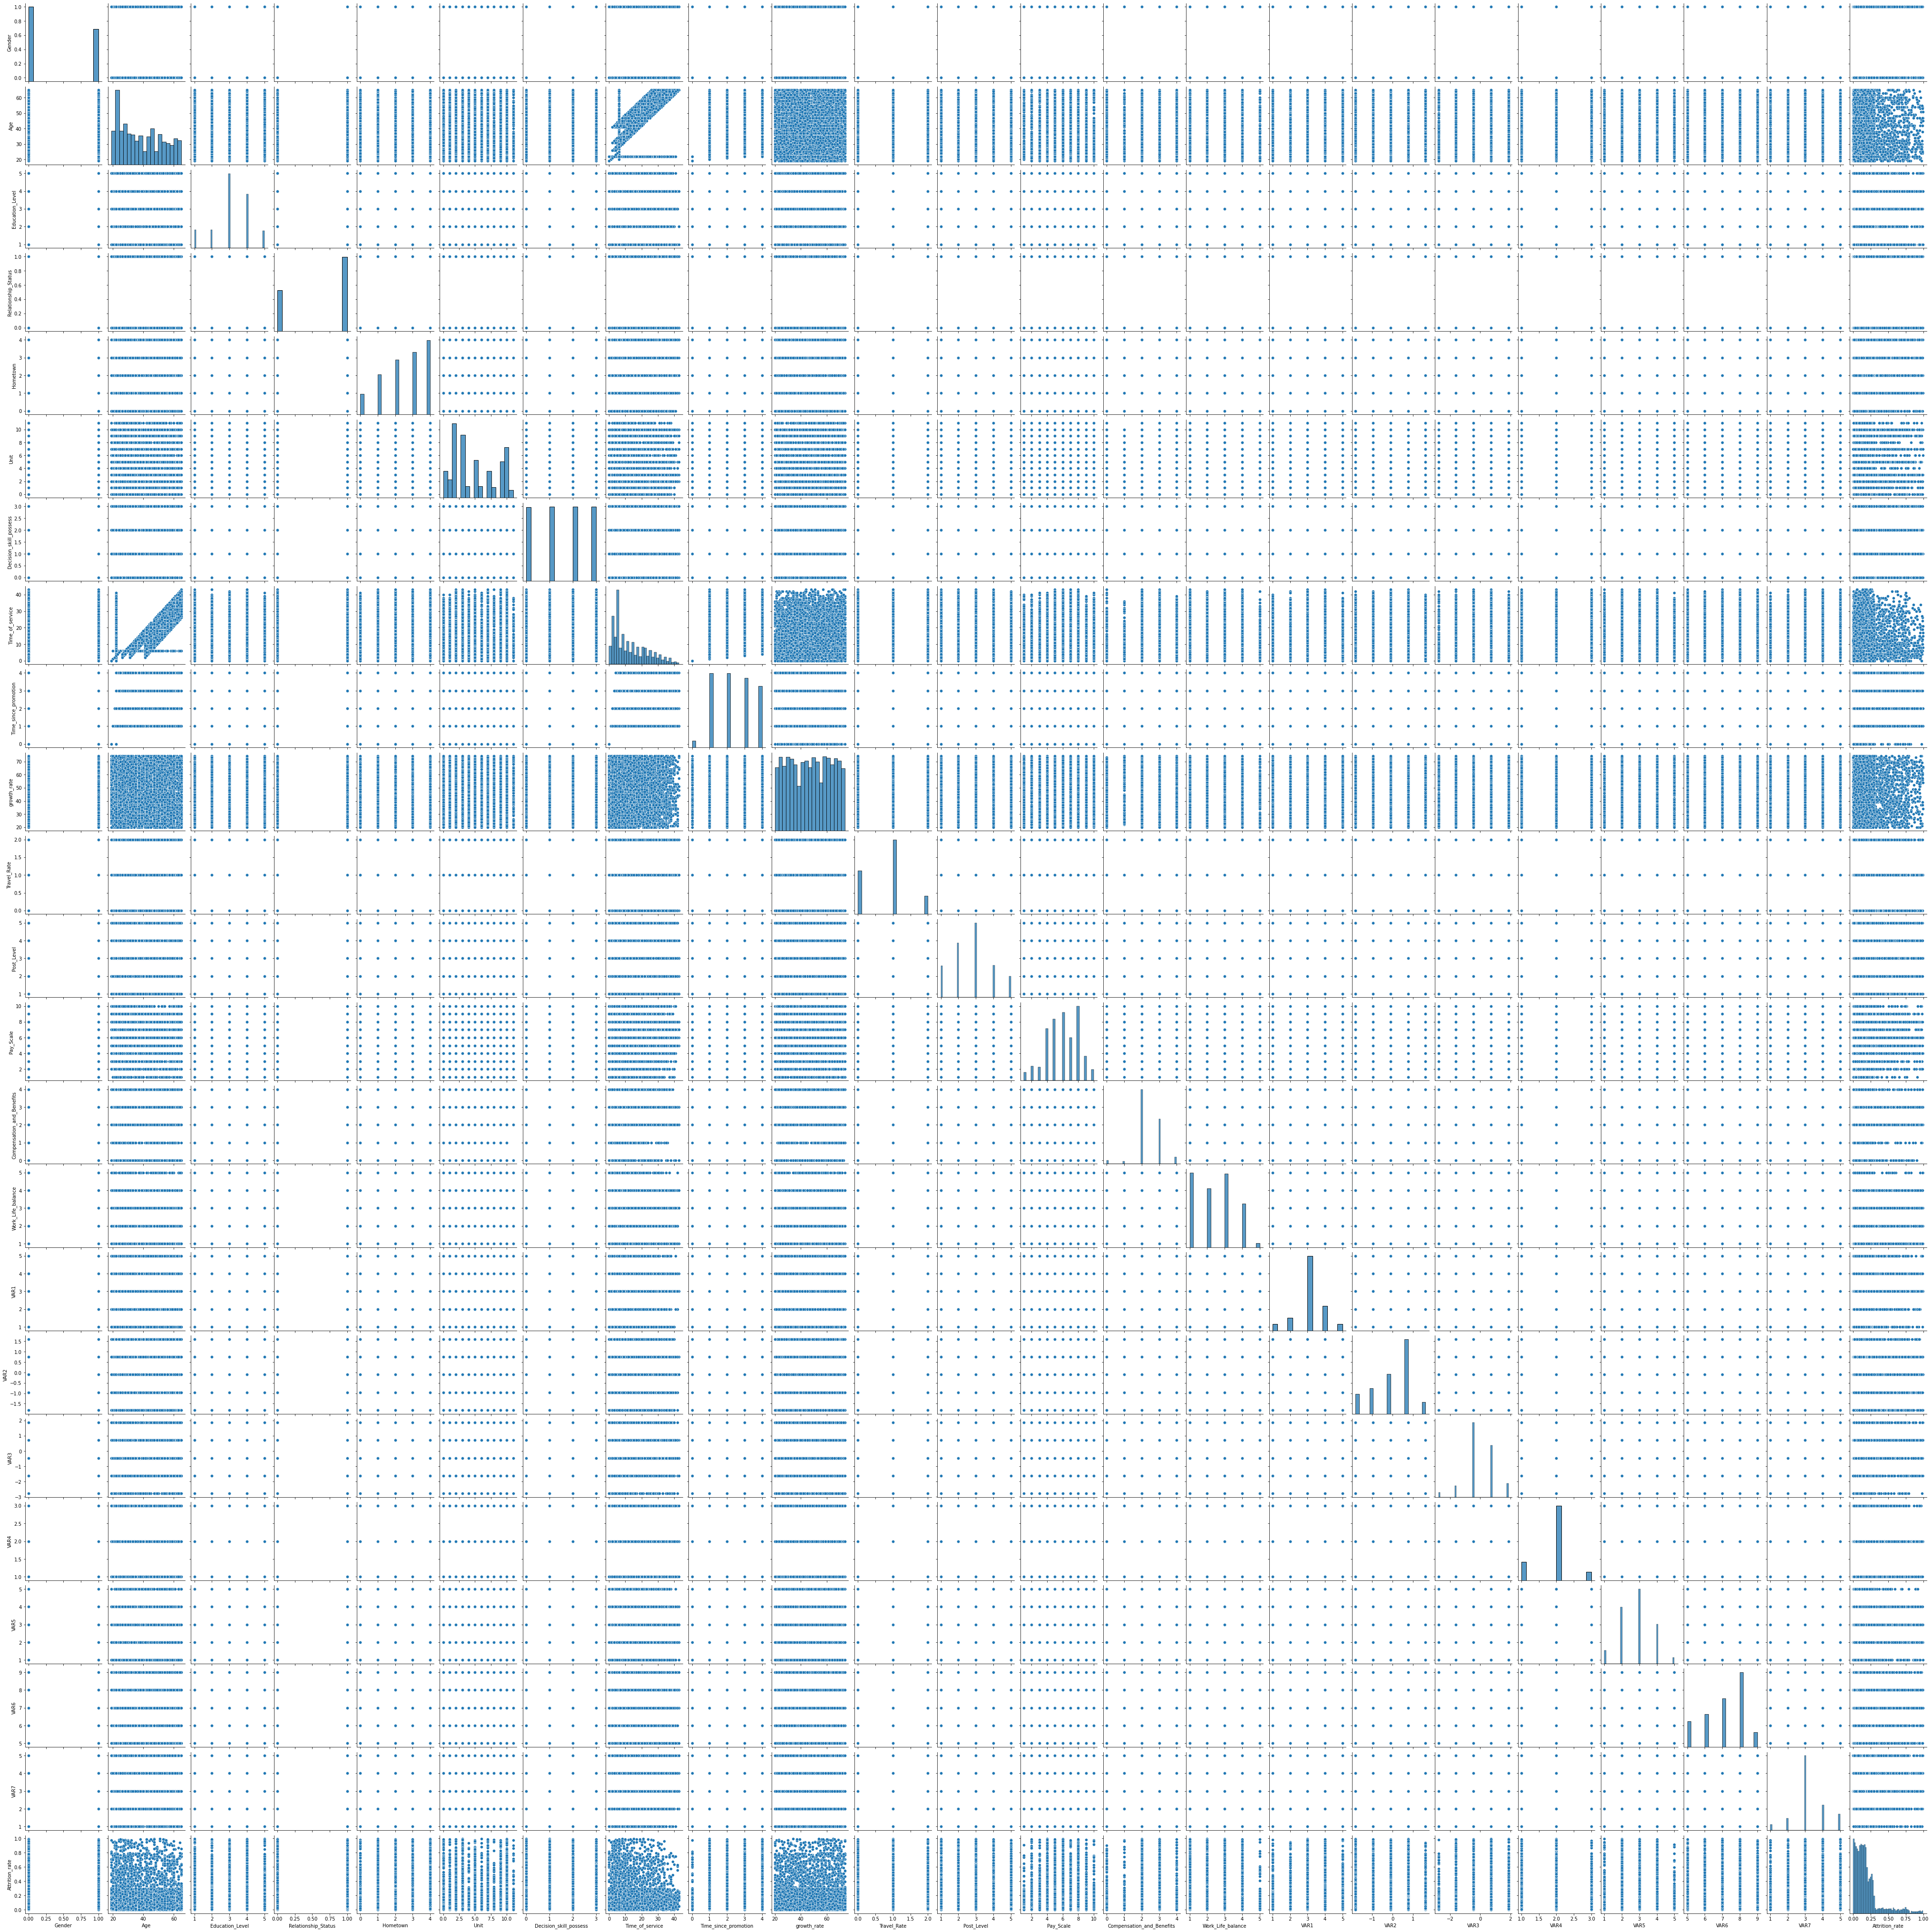

In [51]:
sns.pairplot(train)

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='Gender', ylabel='count'>

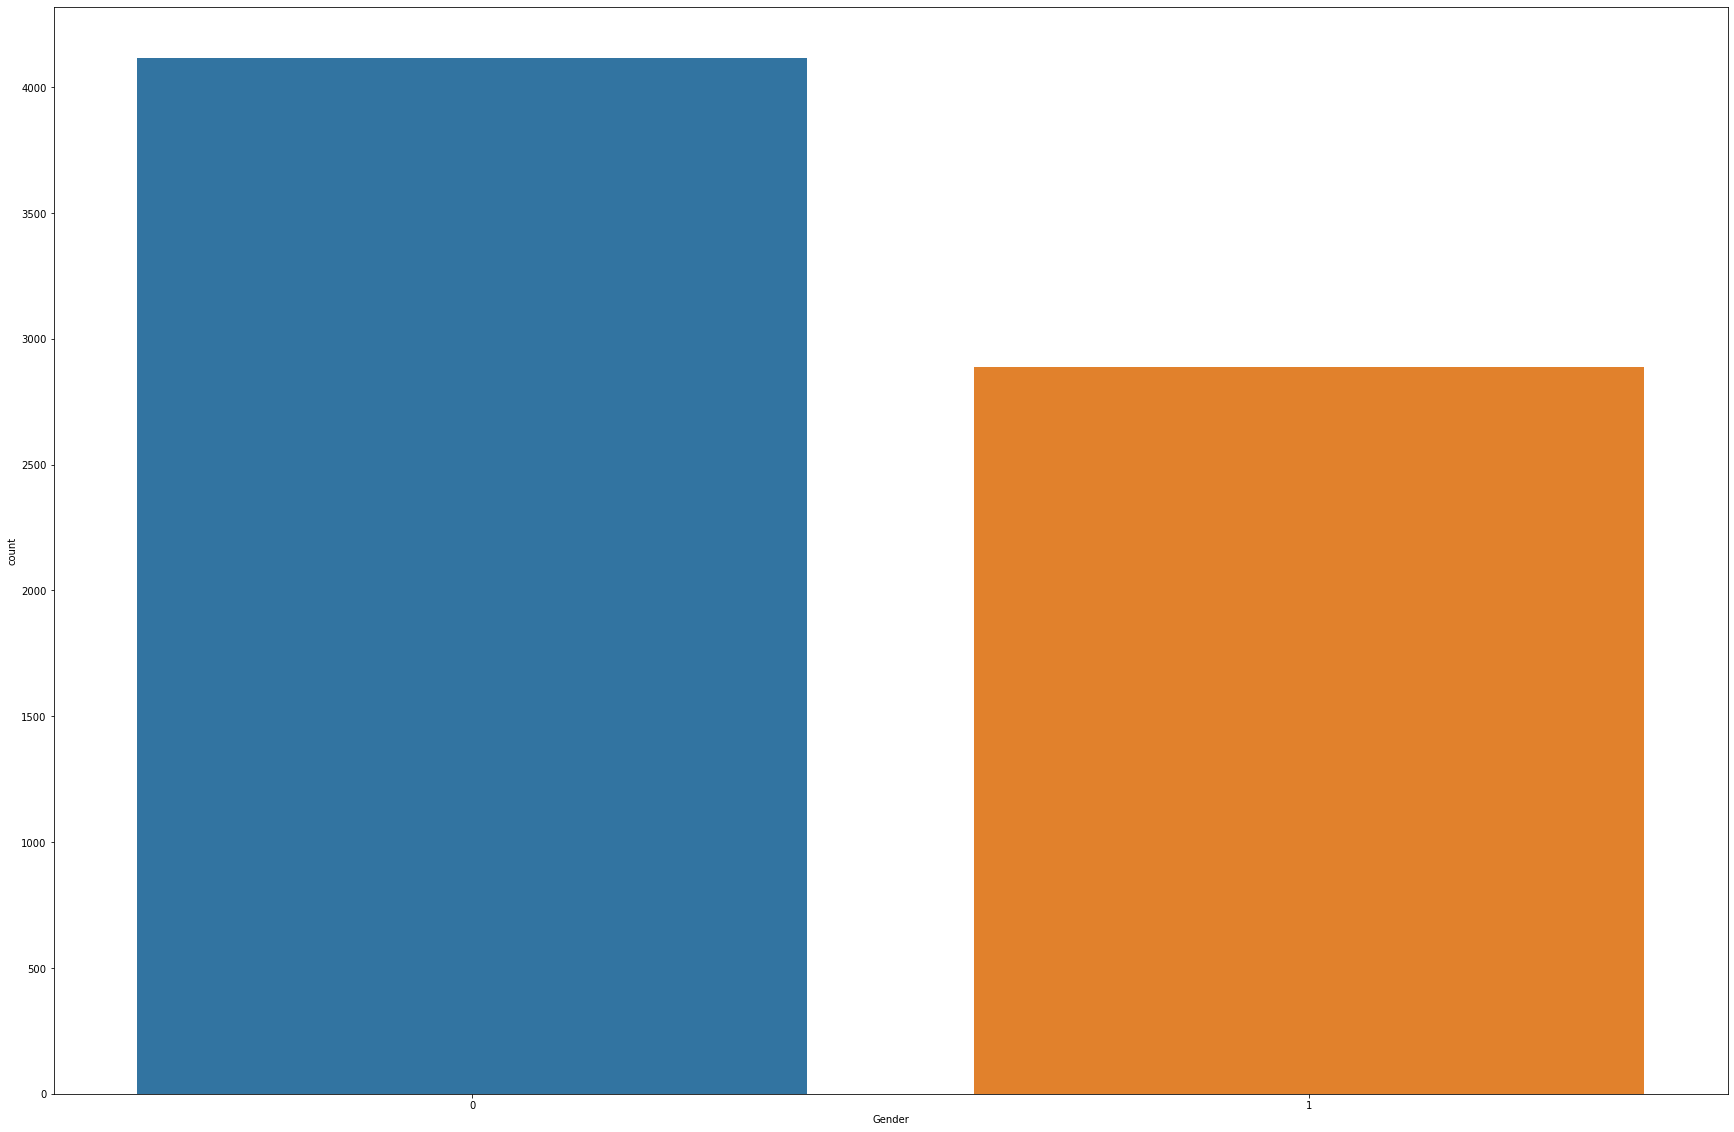

In [41]:
sns.countplot(train_num['Gender'])

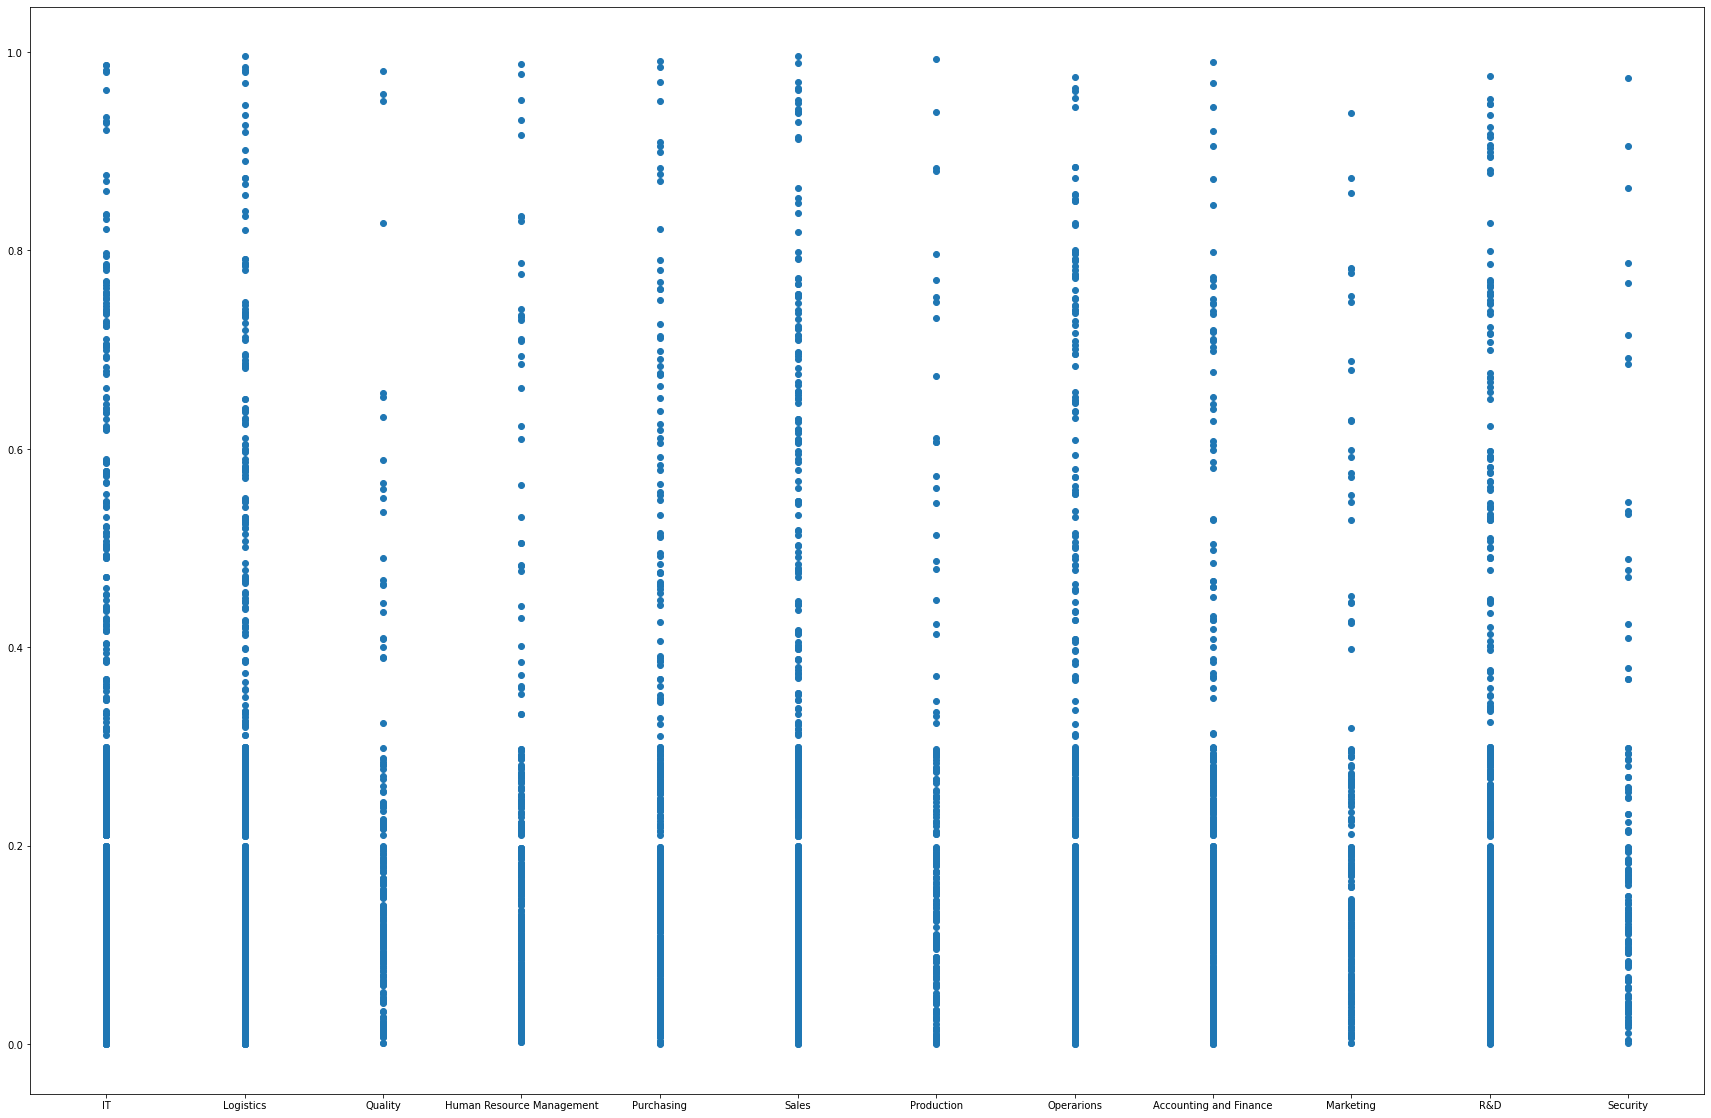

In [48]:
plt.scatter(train_c['Unit'], train['Attrition_rate'])

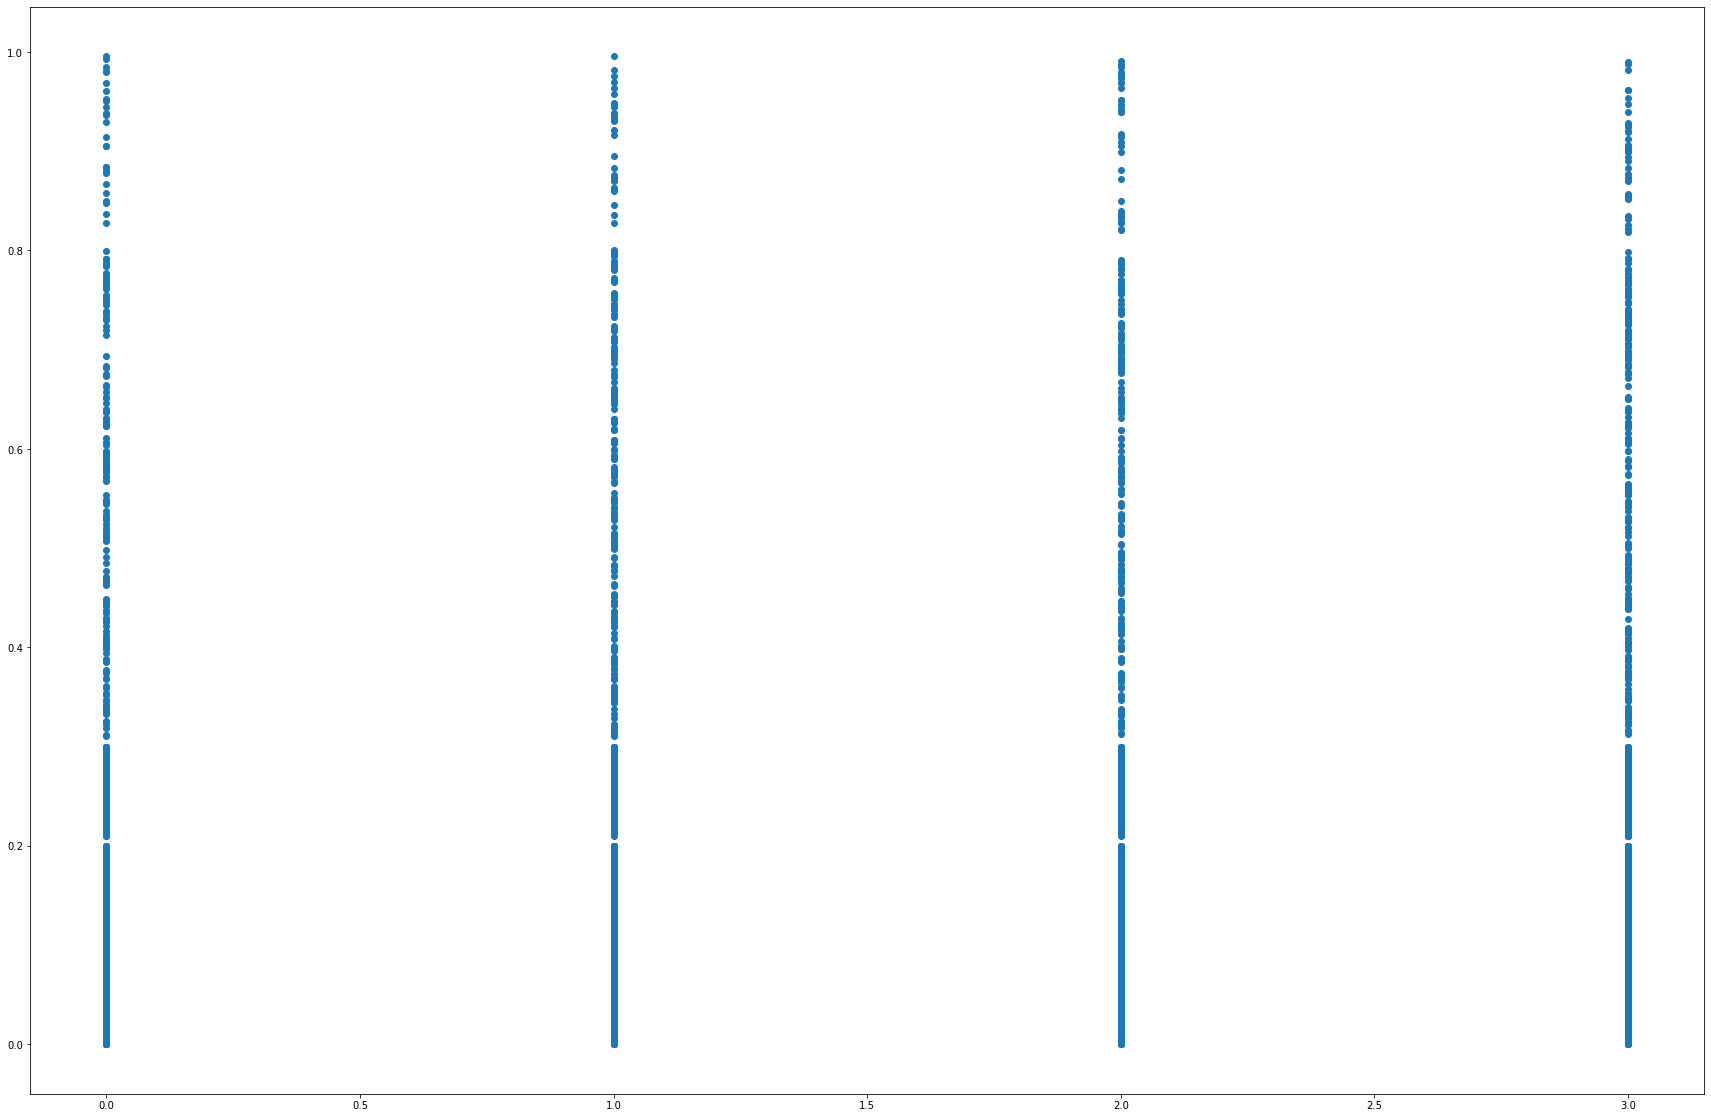

In [49]:
plt.scatter(train_num['Decision_skill_possess'], train['Attrition_rate'])

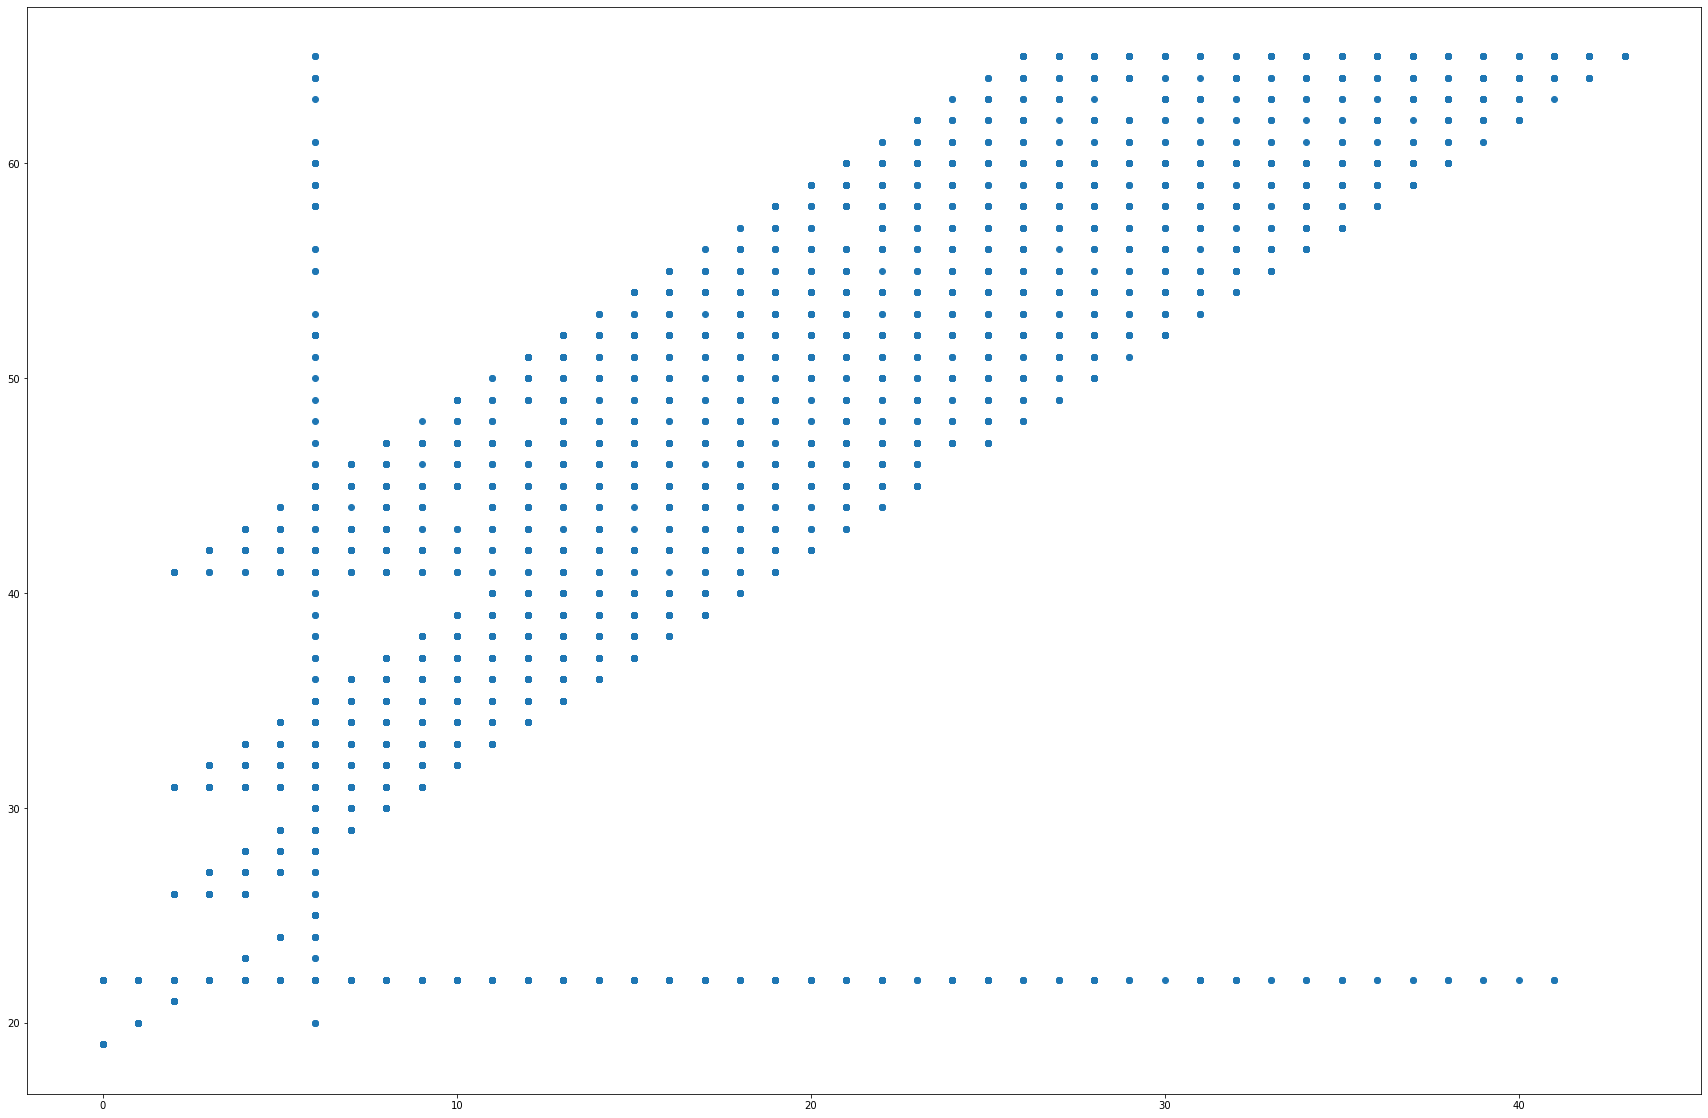

In [50]:
plt.scatter(train_num['Time_of_service'], train['Age'])

Model

In [52]:
model1 = LinearRegression()

In [55]:
x = train_num1
y = train['Attrition_rate']

In [56]:
model1.fit(x, y)
y_pred1 = model1.predict(x)

In [60]:
rmse = mean_squared_error(y, y_pred1, squared = False)
rmse1 = mean_squared_error(y, y_pred1, squared = True)
rmse, rmse1

(0.18520845971616084, 0.034302173550432774)

In [62]:
score = 100 * max(0, (1-rmse))
score

81.47915402838392

In [73]:
model2 = Ridge(alpha = 2, random_state = 9)

In [74]:
model2.fit(x, y)
y_pred2 = model2.predict(x)

In [82]:
rmse2 = mean_squared_error(y, y_pred2, squared = False)
rmse2_1 = mean_squared_error(y, y_pred2, squared = True)
score2 = 100 * max(0, (1-rmse2))
rmse2, rmse2_1, score2

(0.18520845978829126, 0.0343021735771511, 81.47915402117087)

In [76]:
model3 = Lasso(random_state = 9)

In [77]:
model3.fit(x, y)
y_pred3 = model3.predict(x)

In [83]:
rmse3 = mean_squared_error(y, y_pred3, squared = False)
rmse3_1 = mean_squared_error(y, y_pred3, squared = True)
score3 = 100 * max(0, (1-rmse3))
rmse3, rmse3_1, score3

(0.18574000922221678, 0.03449935102586918, 81.42599907777833)

In [94]:
model4 = ElasticNet(l1_ratio = 0.2, random_state = 9)

In [101]:
model4.fit(x, y)
y_pred4 = model4.predict(x)

In [96]:
rmse4 = mean_squared_error(y, y_pred4, squared = False)
rmse4_1 = mean_squared_error(y, y_pred4, squared = True)
score4 = 100 * max(0, (1-rmse4))
rmse4, rmse4_1, score4

(0.18574000922221678, 0.03449935102586918, 81.42599907777833)

In [198]:
model5 = KNeighborsRegressor(n_neighbors=1)

In [199]:
model5.fit(x, y)
y_pred5 = model5.predict(x)

In [200]:
rmse5 = mean_squared_error(y, y_pred5, squared = False)
rmse5_1 = mean_squared_error(y, y_pred5, squared = True)
score5 = 100 * max(0, (1-rmse5))
rmse5, rmse5_1, score5

(0.0, 0.0, 100.0)

In [107]:
test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        2839 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            2948 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  2997 non-null   float

In [108]:
test.isna().sum()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [110]:
test.duplicated().sum()

0

In [114]:
test['Age'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [118]:
test['Time_of_service'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [131]:
test['Pay_Scale'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [124]:
test['Work_Life_balance'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [125]:
test['VAR2'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [126]:
test['VAR4'].mode()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [127]:
test['Age'].fillna(22.0, inplace = True)

In [128]:
test['Time_of_service'].fillna(3.0, inplace = True)

In [132]:
test['Pay_Scale'].fillna(8.0, inplace = True)

In [133]:
test['Work_Life_balance'].fillna(1.0, inplace = True)

In [134]:
test['VAR2'].fillna(0.7516, inplace = True)

In [135]:
test['VAR4'].fillna(2.0, inplace = True)

In [137]:
test.duplicated().sum()

0

In [138]:
test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   object 
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   object 
 5   Hometown                   3000 non-null   object 
 6   Unit                       3000 non-null   object 
 7   Decision_skill_possess     3000 non-null   object 
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [139]:
test['Gender'].replace({'F': 0, 'M': 1}, inplace = True)

In [140]:
test['Relationship_Status'].replace({'Single': 0, 'Married': 1}, inplace = True)

In [147]:
test['Hometown'].replace({'Clinton': 0, 'Washington': 1, 'Franklin': 2, 'Springfield': 3, 'Lebanon': 4}, inplace = True)

In [148]:
test['Unit'] = train['Unit'].astype('category').cat.codes

In [149]:
test['Decision_skill_possess'].replace({'Behavioral': 0, 'Directive': 1, 'Analytical': 2, 'Conceptual': 3}, inplace = True)

In [150]:
test['Compensation_and_Benefits'].replace({'type0': 0, 'type1': 1, 'type2': 2, 'type3': 3, 'type4': 4}, inplace = True)

In [151]:
test.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                3000 non-null   object 
 1   Gender                     3000 non-null   int64  
 2   Age                        3000 non-null   float64
 3   Education_Level            3000 non-null   int64  
 4   Relationship_Status        3000 non-null   int64  
 5   Hometown                   3000 non-null   int64  
 6   Unit                       3000 non-null   int8   
 7   Decision_skill_possess     3000 non-null   int64  
 8   Time_of_service            3000 non-null   float64
 9   Time_since_promotion       3000 non-null   int64  
 10  growth_rate                3000 non-null   int64  
 11  Travel_Rate                3000 non-null   int64  
 12  Post_Level                 3000 non-null   int64  
 13  Pay_Scale                  3000 non-null   float

In [152]:
test_num = test.select_dtypes(include = np.number)
test_num[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [154]:
test_num1 = pd.DataFrame(scale1.fit_transform(test_num), columns = test_num.columns)
test_num1.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [155]:
Y1 = model1.predict(test_num1)

In [156]:
Y2 = model2.predict(test_num1)

In [157]:
Y3 = model3.predict(test_num1)

In [158]:
Y4 = model4.predict(test_num1)

In [201]:
Y5 = model5.predict(test_num1)

In [160]:
submission[0:2]

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [167]:
sub = test_c
sub.head()

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [168]:
sub['Attrition_rate'] = 0.0

In [169]:
sub.drop(columns = ['Gender', 'Age', 'Education_Level', 'Relationship_Status', 'Hometown', 'Unit', 'Decision_skill_possess', 'Time_of_service', 'Time_since_promotion', 'growth_rate', 'Travel_Rate', 'Post_Level', 'Pay_Scale', 'Compensation_and_Benefits', 'Work_Life_balance', 'VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7'], inplace = True)

In [170]:
sub.info()

<class 'lux.core.frame.LuxDataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Employee_ID     3000 non-null   object 
 1   Attrition_rate  3000 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.0+ KB


In [171]:
sub['Attrition_rate'] = np.abs(Y1)
sub.to_csv("ehp1.csv", index = False)

In [172]:
sub['Attrition_rate'] = np.abs(Y2)
sub.to_csv("ehp2.csv", index = False)

In [173]:
sub['Attrition_rate'] = np.abs(Y3)
sub.to_csv("ehp3.csv", index = False)

In [174]:
sub['Attrition_rate'] = np.abs(Y4)
sub.to_csv("ehp4.csv", index = False)

In [202]:
sub['Attrition_rate'] = np.abs(Y5)
sub.to_csv("ehp5.csv", index = False)